In [ ]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import pandas as pd
ages = pd.read_csv("/content/test.csv")
ages

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [ ]:
smoking_and_age = ages[['Maternal Age', 'Maternal Smoker']]
smoking_and_age

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [ ]:
smoking_and_age['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [ ]:
smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [ ]:
non_smoker = smoking_and_age['Maternal Age'] [smoking_and_age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bdbefb910>,
      dtype=object)

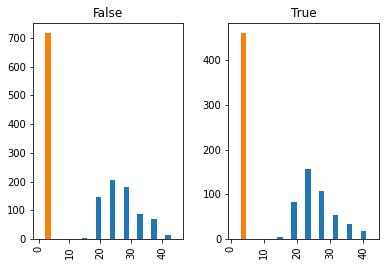

In [ ]:
smoking_and_age.hist(by ='Maternal Smoker')

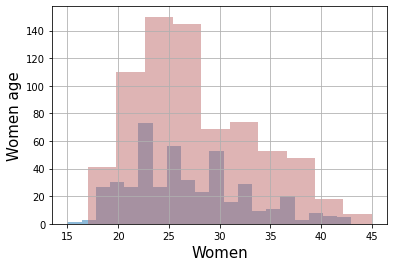

In [ ]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Women age',fontsize=15)
plt.show()

In [ ]:
means_table = smoking_and_age.groupby('Maternal Smoker').mean()
means_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [ ]:
observed_difference = means_table['Maternal Age'][1] - means_table['Maternal Age'][0]
observed_difference

-0.8076725017901509

In [ ]:
smoking_and_age

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [ ]:
shuffled = smoking_and_age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
826,True,121
84,True,125
1005,False,73
231,False,113
886,True,99
...,...,...
517,False,142
641,False,115
1078,True,122
1064,False,158


In [ ]:
differences = np.zeros(5000)
for i in np.arange(5000):
    smoking_and_age = ages[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_age.sample(1174,replace = False)
    shuffled_weights = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_age.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference
differences

array([-1.01845301, -0.30658013, -0.42105215, ..., -1.58723586,
       -2.48870302,  1.01342535])

In [ ]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,-1.018453
1,-0.306580
2,-0.421052
3,1.063507
4,-0.124140
...,...
4995,1.113588
4996,-1.751789
4997,-1.587236
4998,-2.488703


Observed Difference: -0.8076725017901509


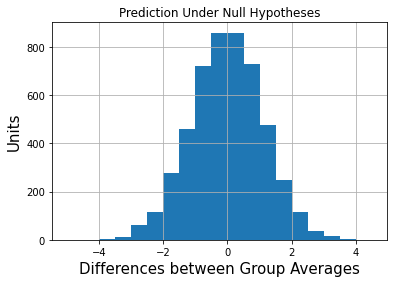

In [ ]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [ ]:
p_val = np.count_nonzero(differences <= observed_difference)/differences.size
p_val

0.2368